In [ ]:
 import pandas as pd

In [ ]:
df = pd.read_csv("employee_attrition_dataset.csv")

In [ ]:
df.shape

(100, 10)

In [ ]:
df.head()

,EmployeeID,Name,Age,Gender,Department,Salary,MaritalStatus,YearsAtCompany,JobSatisfaction,Attrition
0,1000,Christopher Riley,29,Male,HR,62098,Single,4,1,Yes
1,1001,Leslie Rodriguez,59,Female,Sales,33905,Single,6,2,Yes
2,1002,Jenna Bailey,57,Male,Marketing,84987,Single,14,3,Yes
3,1003,Kyle Hampton,32,Female,HR,66421,Single,6,3,Yes
4,1004,Kathleen Roberts,27,Female,Sales,77052,Married,19,3,Yes


In [ ]:
df['Name'] = ['User_'+str(i) for i in range(len(df))]

In [ ]:
df.head()

,EmployeeID,Name,Age,Gender,Department,Salary,MaritalStatus,YearsAtCompany,JobSatisfaction,Attrition
0,1000,User_0,20-30,0,HR,62098,Single,4,1,Yes
1,1001,User_1,50-60,1,Sales,33905,Single,6,2,Yes
2,1002,User_2,50-60,0,Marketing,84987,Single,14,3,Yes
3,1003,User_3,30-40,1,HR,66421,Single,6,3,Yes
4,1004,User_4,20-30,1,Sales,77052,Married,19,3,Yes


In [ ]:
df['Age'].max()

60

In [ ]:
df['Age']  = pd.cut(df['Age'],bins=[20,30,40,50,60],labels=['20-30','30-40','40-50','50-60'])

In [ ]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [ ]:
df['Salary'].agg(['min','max'])


,Salary
min,31267
max,118259


In [ ]:
df['Salary'] = pd.cut(df['Salary'],bins=[30000,50000,100000,200000],labels=['30000-50000','500000-100000','100000-200000'])

In [ ]:
df.head()




,EmployeeID,Name,Age,Gender,Department,Salary,MaritalStatus,YearsAtCompany,JobSatisfaction,Attrition
0,1000,0,0,0,1,2,2,4,1,1
1,1001,1,3,1,4,1,2,6,2,1
2,1002,12,3,0,3,2,2,14,3,1
3,1003,23,1,1,1,2,2,6,3,1
4,1004,34,0,1,4,2,1,19,3,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
categorical_features = ['EmployeeID','Name','Age','Department','Salary','MaritalStatus']

In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':2,'Married':1,'Divorced':0})

In [ ]:

le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])

In [ ]:
df['Department'] = le_attrition.fit_transform(df['Department'])

In [ ]:
df['Name'] = le_attrition.fit_transform(df['Name'])

In [ ]:
df['Age'] = le_attrition.fit_transform(df['Age'])

In [ ]:
df['Salary'] = le_attrition.fit_transform(df['Salary'])

In [ ]:
X = df.drop(columns=['Attrition','Name','EmployeeID'])

In [ ]:
y = df['Attrition']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

,EmployeeID,Name,Age,Gender,Department,Salary,MaritalStatus,YearsAtCompany,JobSatisfaction,Attrition


In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model,X_train)

In [ ]:
shap_values = explainer(X_test)

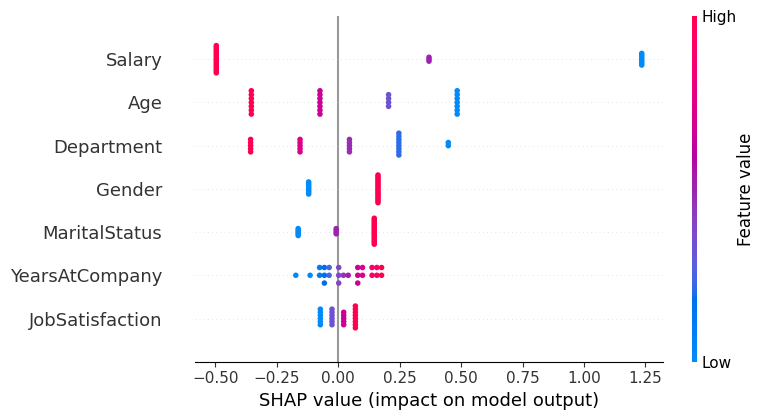

In [ ]:
shap.summary_plot(shap_values,X_test,show=False)

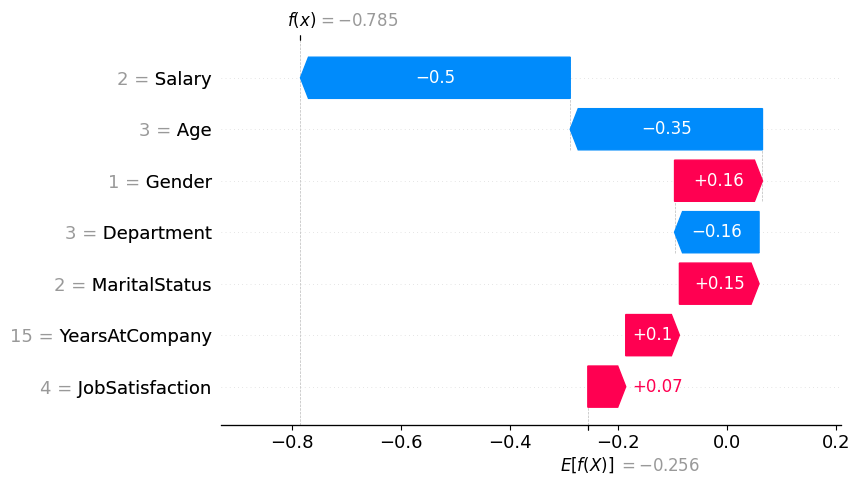

In [ ]:
#  Choose an index
index = 5

# Plot waterfall explanation
shap.plots.waterfall(shap_values[index])